In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Retrieve Data

In [164]:
dataset = "Larger"

MAX = 12
HALF = 6
QUARTER = 4

df_allaround = pd.read_csv("F:\\VUB\\S2\\150_GIT\\50_P&D\\assignments\\parallelism\\measurements\\26-10-firefly-testing-1\\runtimes_Larger.csv", index_col=0, header=None)

# print(df_allaround)


In [165]:

print(df_allaround.T)


0          SEQ  ARTICLE25_TEXT200_1    ARTICLE_1       TEXT_1  \
1   7473320400          11018012100   9814442400  43652360200   
2   7074937700          11012628800  10053317600  42884781600   
3   7093547600          10863597000   9902067300  42874891300   
4   7082410000          10852203700   9835531600  42783408000   
5   7039075100          10818131700   9924724700  43699468100   
6   7112033500          10888896700   9834530600  43708424000   
7   7046658700          10845681300   9831119400  46709989100   
8   7046018700          10797742700   9832600500  46681009500   
9   7066906100          10833966700   9794033200  43754757300   
10  7027191300          10852564900   9817365700  43616453500   
11  7068388600          10875053800   9817920500  43641008600   
12  7080666100          10897057100   9835981900  43957258600   
13  7025665000          10853422900   9862759200  43563889200   
14  7059897600          10829500400   9949632200  44670640000   
15  7055476500          1

## Transform Data

In [166]:

df_allaroundT = pd.DataFrame(df_allaround.T, columns=["SEQ","ARTICLE25_TEXT200_1", "ARTICLE_1", "TEXT_1", "ARTICLE25_TEXT200_4", "ARTICLE_4", "TEXT_4", "ARTICLE_HALF", "TEXT_HALF", "ARTICLE_MAX", "TEXT_MAX"]) # transpose the data

print(df_allaroundT)



           SEQ  ARTICLE25_TEXT200_1    ARTICLE_1       TEXT_1  \
1   7473320400          11018012100   9814442400  43652360200   
2   7074937700          11012628800  10053317600  42884781600   
3   7093547600          10863597000   9902067300  42874891300   
4   7082410000          10852203700   9835531600  42783408000   
5   7039075100          10818131700   9924724700  43699468100   
6   7112033500          10888896700   9834530600  43708424000   
7   7046658700          10845681300   9831119400  46709989100   
8   7046018700          10797742700   9832600500  46681009500   
9   7066906100          10833966700   9794033200  43754757300   
10  7027191300          10852564900   9817365700  43616453500   
11  7068388600          10875053800   9817920500  43641008600   
12  7080666100          10897057100   9835981900  43957258600   
13  7025665000          10853422900   9862759200  43563889200   
14  7059897600          10829500400   9949632200  44670640000   
15  7055476500          1

### Removing first 5 iterations (warmup)

In [167]:
df_allaroundT = df_allaroundT.iloc[5:]

print(df_allaroundT)


           SEQ  ARTICLE25_TEXT200_1   ARTICLE_1       TEXT_1  \
6   7112033500          10888896700  9834530600  43708424000   
7   7046658700          10845681300  9831119400  46709989100   
8   7046018700          10797742700  9832600500  46681009500   
9   7066906100          10833966700  9794033200  43754757300   
10  7027191300          10852564900  9817365700  43616453500   
11  7068388600          10875053800  9817920500  43641008600   
12  7080666100          10897057100  9835981900  43957258600   
13  7025665000          10853422900  9862759200  43563889200   
14  7059897600          10829500400  9949632200  44670640000   
15  7055476500          10843118800  9992470900  47313274300   

    ARTICLE25_TEXT200_4   ARTICLE_4       TEXT_4  ARTICLE_HALF    TEXT_HALF  \
6            3307417300  2573602700  12340651800    2034862800   9711251100   
7            3003363300  2598372400  12426611700    1996526300   9802291600   
8            2941999000  2588284000  12389376500    202008

### Intermediary Plot

In [168]:
data = df_allaroundT

fig = px.line(data)

fig.show()


## Scale the columns

In [169]:
# divide = 1000000
# divide =  1000000000 # to seconds
divide = 1000000 # to milliseconds

df_allaroundT["SEQ_SCALED"] = df_allaroundT["SEQ"].apply(lambda x: round(x / divide,2))

df_allaroundT["ARTICLE25_TEXT200_1_SCALED"] = df_allaroundT["ARTICLE25_TEXT200_1"].apply(lambda x: round(x / divide,2))
df_allaroundT["ARTICLE_1_SCALED"] = df_allaroundT["ARTICLE_1"].apply(lambda x: round(x / divide,2))
df_allaroundT["TEXT_1_SCALED"] = df_allaroundT["TEXT_1"].apply(lambda x: round(x / divide,2))

df_allaroundT["ARTICLE25_TEXT200_4_SCALED"] = df_allaroundT["ARTICLE25_TEXT200_1"].apply(lambda x: round(x / divide,2))
df_allaroundT["ARTICLE_4_SCALED"] = df_allaroundT["ARTICLE_4"].apply(lambda x: round(x / divide,2))
df_allaroundT["TEXT_4_SCALED"] = df_allaroundT["TEXT_4"].apply(lambda x: round(x / divide,2))


df_allaroundT["ARTICLE_HALF_SCALED"] = df_allaroundT["ARTICLE_HALF"].apply(lambda x: round(x / divide,2))
df_allaroundT["TEXT_HALF_SCALED"] = df_allaroundT["TEXT_HALF"].apply(lambda x: round(x / divide,2))

df_allaroundT["ARTICLE_MAX_SCALED"] = df_allaroundT["ARTICLE_MAX"].apply(lambda x: round(x / divide,2))
df_allaroundT["TEXT_MAX_SCALED"] = df_allaroundT["TEXT_MAX"].apply(lambda x: round(x / divide,2))

print(df_allaroundT)



           SEQ  ARTICLE25_TEXT200_1   ARTICLE_1       TEXT_1  \
6   7112033500          10888896700  9834530600  43708424000   
7   7046658700          10845681300  9831119400  46709989100   
8   7046018700          10797742700  9832600500  46681009500   
9   7066906100          10833966700  9794033200  43754757300   
10  7027191300          10852564900  9817365700  43616453500   
11  7068388600          10875053800  9817920500  43641008600   
12  7080666100          10897057100  9835981900  43957258600   
13  7025665000          10853422900  9862759200  43563889200   
14  7059897600          10829500400  9949632200  44670640000   
15  7055476500          10843118800  9992470900  47313274300   

    ARTICLE25_TEXT200_4   ARTICLE_4       TEXT_4  ARTICLE_HALF    TEXT_HALF  \
6            3307417300  2573602700  12340651800    2034862800   9711251100   
7            3003363300  2598372400  12426611700    1996526300   9802291600   
8            2941999000  2588284000  12389376500    202008

### Intermediary Plot

In [170]:

scaled_columns = []
for column in df_allaroundT.columns:
    if "SCALED" in column:
        scaled_columns.append(column)

data = df_allaroundT[scaled_columns]

fig = px.line(data)
fig.show()



#### Phase 1 - Articles Parallel

In [171]:


data = df_allaroundT[["SEQ_SCALED", "ARTICLE_1_SCALED",  "ARTICLE_4_SCALED", "ARTICLE_HALF_SCALED", "ARTICLE_MAX_SCALED"]]
fig = px.line(data)

fig.show()

##### Phase 2 - Text Parallel

In [172]:

data = df_allaroundT[["SEQ_SCALED", "TEXT_1_SCALED", "TEXT_4_SCALED", "TEXT_HALF_SCALED",  "TEXT_MAX_SCALED"]]
fig = px.line(data)

fig.show()



## Extract Parameters

In [173]:

df_allaroundT


,SEQ,ARTICLE25_TEXT200_1,ARTICLE_1,TEXT_1,ARTICLE25_TEXT200_4,ARTICLE_4,TEXT_4,ARTICLE_HALF,TEXT_HALF,ARTICLE_MAX,...,ARTICLE25_TEXT200_1_SCALED,ARTICLE_1_SCALED,TEXT_1_SCALED,ARTICLE25_TEXT200_4_SCALED,ARTICLE_4_SCALED,TEXT_4_SCALED,ARTICLE_HALF_SCALED,TEXT_HALF_SCALED,ARTICLE_MAX_SCALED,TEXT_MAX_SCALED
6,7112033500,10888896700,9834530600,43708424000,3307417300,2573602700,12340651800,2034862800,9711251100,1374750900,...,10888.90,9834.53,43708.42,10888.90,2573.60,12340.65,2034.86,9711.25,1374.75,7756.46
7,7046658700,10845681300,9831119400,46709989100,3003363300,2598372400,12426611700,1996526300,9802291600,1383917700,...,10845.68,9831.12,46709.99,10845.68,2598.37,12426.61,1996.53,9802.29,1383.92,8032.32
8,7046018700,10797742700,9832600500,46681009500,2941999000,2588284000,12389376500,2020082500,9689009700,1389122800,...,10797.74,9832.60,46681.01,10797.74,2588.28,12389.38,2020.08,9689.01,1389.12,7726.10
9,7066906100,10833966700,9794033200,43754757300,2934276800,2664368800,12486452200,2012535000,9708092200,1506678900,...,10833.97,9794.03,43754.76,10833.97,2664.37,12486.45,2012.54,9708.09,1506.68,7780.56
10,7027191300,10852564900,9817365700,43616453500,3057713400,2609071200,12320957900,2016236700,9774864200,1410669600,...,10852.56,9817.37,43616.45,10852.56,2609.07,12320.96,2016.24,9774.86,1410.67,7748.51
11,7068388600,10875053800,9817920500,43641008600,2949260300,2658202900,12431464600,2063340500,9807625700,1400426100,...,10875.05,9817.92,43641.01,10875.05,2658.20,12431.46,2063.34,9807.63,1400.43,7829.23
12,7080666100,10897057100,9835981900,43957258600,2930646600,2723174300,12387272800,2025335000,9997156100,1396761300,...,10897.06,9835.98,43957.26,10897.06,2723.17,12387.27,2025.34,9997.16,1396.76,7808.84
13,7025665000,10853422900,9862759200,43563889200,2897655700,2754338600,12538687400,1981670500,10713960600,1369820000,...,10853.42,9862.76,43563.89,10853.42,2754.34,12538.69,1981.67,10713.96,1369.82,7816.11
14,7059897600,10829500400,9949632200,44670640000,2926770400,2683290900,12494482700,1985000100,9830335400,1387393800,...,10829.50,9949.63,44670.64,10829.50,2683.29,12494.48,1985.00,9830.34,1387.39,7741.49
15,7055476500,10843118800,9992470900,47313274300,2980792700,2635461500,12336563500,2075638500,9867422500,1394523900,...,10843.12,9992.47,47313.27,10843.12,2635.46,12336.56,2075.64,9867.42,1394.52,7709.59


In [174]:

columns = [ "SEQ", "ARTICLE25_TEXT200_1", "ARTICLE_1", "TEXT_1", "ARTICLE25_TEXT200_4", "ARTICLE_4", "TEXT_4", "ARTICLE_HALF", "TEXT_HALF",  "ARTICLE_MAX", "TEXT_MAX" ]
rows = [ "mean", "median", "max", "min", "overhead", "computation_speedup", "efficiency", "application_speedup" ]

df_allaroundNew = pd.DataFrame(columns=columns, index=rows)


for column in columns:
    # print("Extracting parameters for: "+column)
    newColumnName = column+"_SCALED"
    df_allaroundNew.loc["mean", column] = round(df_allaroundT[newColumnName].mean(),2)
    df_allaroundNew.loc["median", column] = round(df_allaroundT[newColumnName].median(),2)
    df_allaroundNew.loc["max", column] = round(df_allaroundT[newColumnName].max(),2)
    df_allaroundNew.loc["min", column] = round(df_allaroundT[newColumnName].min(),2)

# Overhead
df_allaroundNew.loc["overhead", "ARTICLE25_TEXT200_1"]  = df_allaroundNew["ARTICLE25_TEXT200_1"]["median"] / df_allaroundNew["SEQ"]["median"]
df_allaroundNew.loc["overhead", "ARTICLE_1"]  = df_allaroundNew["ARTICLE_1"]["median"] / df_allaroundNew["SEQ"]["median"]
df_allaroundNew.loc["overhead", "TEXT_1"]  = df_allaroundNew["TEXT_1"]["median"] / df_allaroundNew["SEQ"]["median"]


# TODO: Verify correctness
# Application Speedup
application_speedup = [ "ARTICLE25_TEXT200_1", "ARTICLE_1", "TEXT_1", "ARTICLE25_TEXT200_4", "ARTICLE_4", "TEXT_4", "ARTICLE_HALF", "TEXT_HALF",  "ARTICLE_MAX", "TEXT_MAX" ]

for column in application_speedup:
    # print("Application Speedup for: "+column)
    df_allaroundNew.loc["application_speedup", column]  = df_allaroundNew["SEQ"]["median"] / df_allaroundNew[column]["median"]


# TODO: Verify correctness    
# Computational Speedup
computational_speedup = [ "ARTICLE25_TEXT200_4", "ARTICLE_4", "TEXT_4", "ARTICLE_HALF", "TEXT_HALF",  "ARTICLE_MAX", "TEXT_MAX" ]

for column in computational_speedup:
    # print("Computational Speedup for: "+column)
    to = ""
    if "ARTICLE" in column and "TEXT" in column:
        to = "ARTICLE25_TEXT200_1"
    elif "ARTICLE" in column:
        to = "ARTICLE_1"
    elif "TEXT" in column:
        to = "TEXT_1"

    df_allaroundNew.loc["computation_speedup", column]  = df_allaroundNew[to]["median"] / df_allaroundNew[column]["median"]


# TODO: Verify correctness  
# Efficiency
efficiency = [ "ARTICLE25_TEXT200_4", "ARTICLE_4", "TEXT_4", "ARTICLE_HALF", "TEXT_HALF",  "ARTICLE_MAX", "TEXT_MAX" ]

for column in efficiency:
    # print("Computational Speedup for: "+column)
    to = ""
    if "ARTICLE" in column and "TEXT" in column:
        to = "ARTICLE25_TEXT200_1"
    elif "ARTICLE" in column:
        to = "ARTICLE_1"
    elif "TEXT" in column:
        to = "TEXT_1"

    workers = 0
    if "4" in column:
        workers = 4
    elif "MAX" in column:
        workers = MAX
    elif "HALF" in column:
        workers = HALF
    elif "32" in column:
        workers = QUARTER

    df_allaroundNew.loc["efficiency", column]  = df_allaroundNew[to]["median"] / (workers * df_allaroundNew[column]["median"])

df_allaroundNew


,SEQ,ARTICLE25_TEXT200_1,ARTICLE_1,TEXT_1,ARTICLE25_TEXT200_4,ARTICLE_4,TEXT_4,ARTICLE_HALF,TEXT_HALF,ARTICLE_MAX,TEXT_MAX
mean,7058.89,10851.7,9856.84,44761.67,10851.7,2648.82,12415.25,2021.12,9890.2,1401.41,7794.92
median,7057.69,10849.12,9833.56,43856.01,10849.12,2646.83,12408.0,2018.16,9804.96,1391.82,7768.51
max,7112.03,10897.06,9992.47,47313.27,10897.06,2754.34,12538.69,2075.64,10713.96,1506.68,8032.32
min,7025.66,10797.74,9794.03,43563.89,10797.74,2573.6,12320.96,1981.67,9689.01,1369.82,7709.59
overhead,NaN,1.537206,1.393311,6.213933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
computation_speedup,NaN,NaN,NaN,NaN,1.0,3.715222,3.534495,4.872537,4.472839,7.065253,5.645357
efficiency,NaN,NaN,NaN,NaN,0.25,0.928805,0.883624,0.81209,0.745473,0.588771,0.470446
application_speedup,NaN,0.650531,0.717715,0.160929,0.650531,2.666469,0.568802,3.497091,0.719808,5.070835,0.9085


## Plot Data

#### Median

In [175]:


data = df_allaroundNew.loc["median", 'SEQ':]
fig = px.line(y=data, x=df_allaroundNew.columns)
fig.show()



In [176]:

# Text sequential
# 10 or 20 or 50
# 100
# 200 (current)

# Articles sequential
# ...
# 50 (this)


# data = df_allaroundNew.loc["median", 'SEQ':'ARTICLE_TEXT_MAX']
# 
# fig = px.line(data)
# 
# fig.show()

#### Computation Speedup

In [177]:
data = df_allaroundNew.loc["computation_speedup", 'ARTICLE25_TEXT200_4':]

fig = px.line(data)

fig.show()

### Efficiency

In [178]:
data = df_allaroundNew.loc["efficiency", 'ARTICLE25_TEXT200_4':]

fig = px.line(data)

fig.show()

#### Application Speedup

In [179]:
data = df_allaroundNew.loc["application_speedup", 'ARTICLE25_TEXT200_1':]

fig = px.line(data)

fig.show()

## Plotly Charts


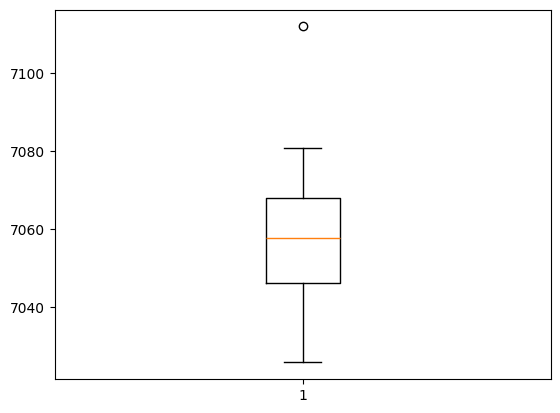

In [180]:

data = df_allaroundT["SEQ_SCALED"]

plt.boxplot(data, vert=True)
plt.show()


### Divider

In [181]:

data = df_allaroundT["SEQ_SCALED"]

fig = px.line(data)

fig.show()


#### Divider